### Notebook to implement recursive WLS method
This notebook implements the recursive version of the weighted least-squares (WLS) method presented in lesson 4.2.3. It is similar to the method presented in lesson 4.2.2, but initializes the estimate using Qnom.

In [11]:
% Set up data for problem: Note that the "x" vector was chosen deterministically for this problem
% and the "y" vector was generated randomly assuming a true capacity of 10 Ah.
Qnom = 10;                                  % Initialize nominal capacity
gamma = 0.5;                                % Fading-memory rate constant. Default = 1.0
Sigmay = 0.2^2;                             % Variance of random noise on "y" when generating data
c1 = 1/Sigmay;                              % Correct initialization of c1 recursive value
c2 = Qnom/Sigmay;                           % Correct initialization of c2 recursive value
c1 = 0; c2 = 0;                           % Incorrect (suboptimal) initialization of c1 and c2 values
x = [0 0.2 0.4 0.6 0.8 1.0];                % Data for problem: no noise on "x" in this example
y = [-0.04, 2.18, 3.85, 5.72, 7.72, 10.10]; % y = Q*x + sqrt(Sigmay)*randn(size(x));

est = zeros(1,length(x));
for k = 1:length(x),
  c1 = gamma*c1 + x(k)^2/Sigmay;            % Update c1 recursive parameter
  c2 = gamma*c2 + x(k)*y(k)/Sigmay;         % Update c2 recursive parameter
  est(k) = c2/c1;
end
Qhat = c2/c1                                % The WLS estimate of capacity Q

Qhat =  9.9586


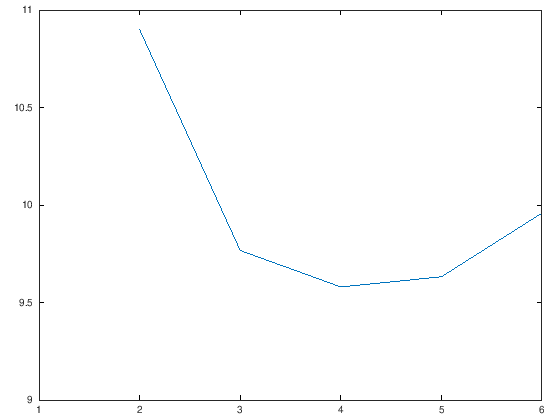

In [12]:
figure(1)
plot(1:length(x), est); hold on;